Processed 1000 accounts. Total MBR locked: 141.5 ALGOs
Processed 2000 accounts. Total MBR locked: 283.2 ALGOs
Processed 3000 accounts. Total MBR locked: 428.2 ALGOs
Processed 4000 accounts. Total MBR locked: 568.9 ALGOs
Processed 5000 accounts. Total MBR locked: 710.8 ALGOs
Processed 6000 accounts. Total MBR locked: 850.4 ALGOs
Processed 7000 accounts. Total MBR locked: 992.0 ALGOs
Processed 8000 accounts. Total MBR locked: 1133.3 ALGOs
Processed 9000 accounts. Total MBR locked: 1278.4 ALGOs
Processed 10000 accounts. Total MBR locked: 1420.6 ALGOs
Processed 11000 accounts. Total MBR locked: 1561.7 ALGOs
Processed 12000 accounts. Total MBR locked: 1706.7 ALGOs
Processed 13000 accounts. Total MBR locked: 1848.0 ALGOs
Processed 14000 accounts. Total MBR locked: 1991.9 ALGOs
Processed 15000 accounts. Total MBR locked: 2137.5 ALGOs
Processed 16000 accounts. Total MBR locked: 2281.3 ALGOs
Processed 17000 accounts. Total MBR locked: 2422.3 ALGOs
Processed 18000 accounts. Total MBR locked: 256

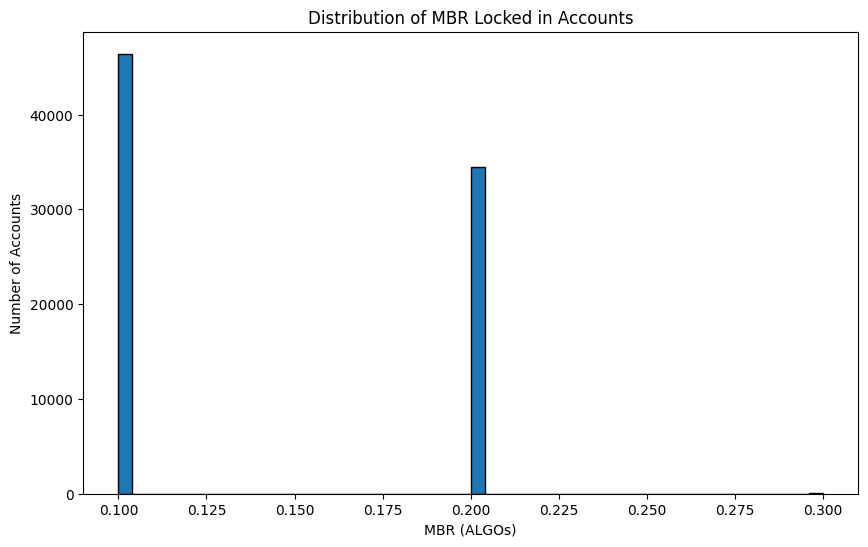

In [27]:
import json
from algosdk.v2client import indexer
import pandas as pd
import matplotlib.pyplot as plt
import time

def connect_to_indexer():
    indexer_address = "https://mainnet-idx.algonode.cloud"  # May need to change the address due to the limit exception
    indexer_token = "" 

    return indexer.IndexerClient(indexer_token, indexer_address)

def calculate_mbr(account):
    base_mbr = 100000  

    # MBR for each asset in microAlgos
    assets_mbr = 100000 if len(account.get('assets', [])) > 0 else 0

    # MBR for each app in microAlgos
    apps_mbr = 100000 if len(account.get('created-apps', [])) > 0 else 0

    # MBR for each box in microAlgos
    boxes_mbr = 0
    if 'created-apps' in account:
        for app in account['created-apps']:
            if 'box-names' in app:
                for box in app['box-names']:
                    boxes_mbr += 2500 + 400 * len(box['name'])

    total_mbr = base_mbr + assets_mbr + apps_mbr + boxes_mbr

    return total_mbr

def get_mbr_locked(indexer_client):
    next_token = None
    total_mbr_locked = 0
    total_accounts = 0
    accounts_data = []
    retries = 0

    while True:
        try:
            response = indexer_client.accounts(limit=1000, next_page=next_token)
            
        except Exception as e:
            print(f"Error fetching accounts: {e}")
            time.sleep(5)
            if retries >= 5:
                break
            retries += 1
            continue
        
        accounts = response.get('accounts', [])
        if not accounts:
            break

        for account in accounts:
            mbr = calculate_mbr(account)
            total_mbr_locked += mbr
            accounts_data.append({
                "account_id": account['address'],
                "mbr": mbr / 1e6  # Convert microAlgos to Algos
            })
            
        next_token = response.get('next-token', None)
        total_accounts += len(accounts)
        print(f"Processed {total_accounts} accounts. Total MBR locked: {total_mbr_locked / 1e6} ALGOs")
        if not next_token:
            break

    return total_mbr_locked / 1e6, accounts_data  # Convert microAlgos to Algos

def visualize_mbr_data(accounts_data):
    df = pd.DataFrame(accounts_data)
    df.set_index("account_id", inplace=True)

    # Plotting the MBR distribution
    plt.figure(figsize=(10, 6))
    df['mbr'].plot(kind='hist', bins=50, edgecolor='black')
    plt.title('Distribution of MBR Locked in Accounts')
    plt.xlabel('MBR (ALGOs)')
    plt.ylabel('Number of Accounts')
    plt.show()


indexer_client = connect_to_indexer()
mbr_locked, accounts_data = get_mbr_locked(indexer_client)
print(f"Total MBR locked in the Algorand network: {mbr_locked} ALGOs")
visualize_mbr_data(accounts_data)


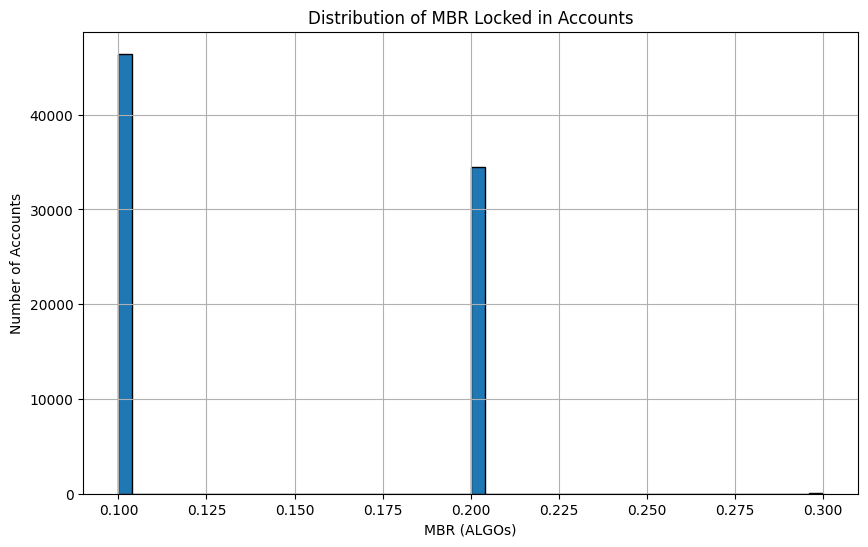

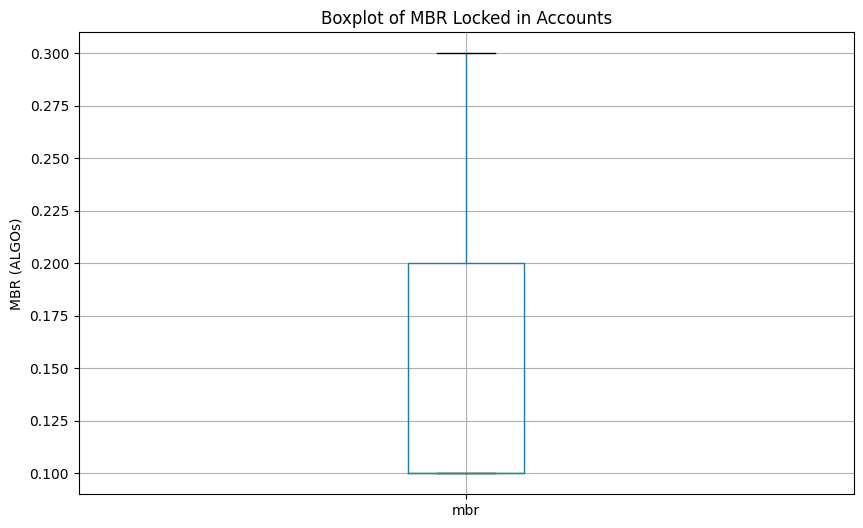

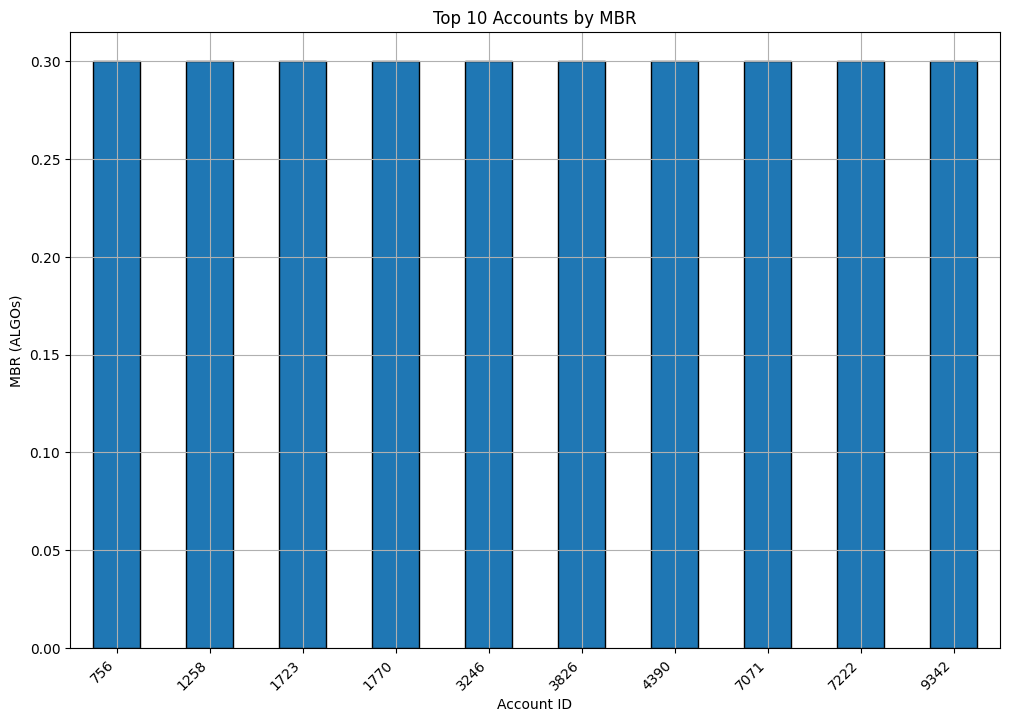

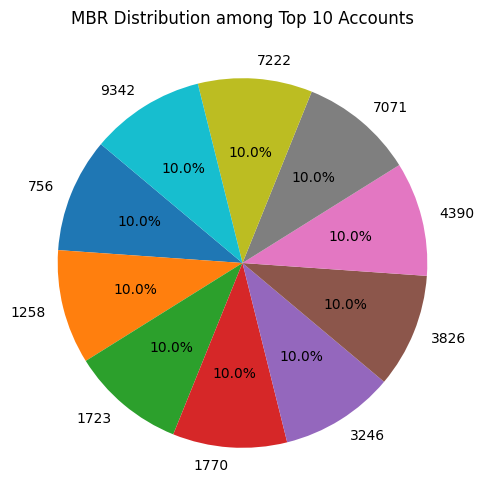

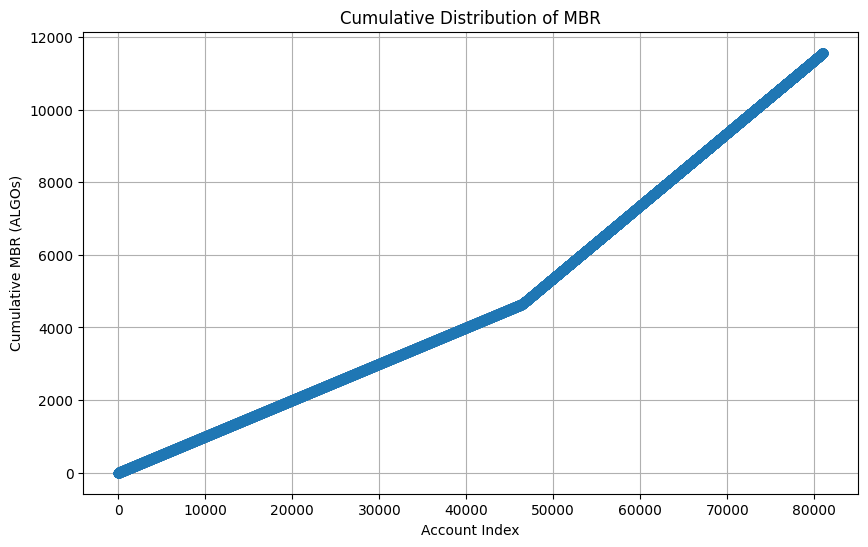

In [16]:
def plot_mbr_distribution(df):
    plt.figure(figsize=(10, 6))
    df['mbr'].plot(kind='hist', bins=50, edgecolor='black')
    plt.title('Distribution of MBR Locked in Accounts')
    plt.xlabel('MBR (ALGOs)')
    plt.ylabel('Number of Accounts')
    plt.grid(True)
    plt.show()

def plot_mbr_boxplot(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column='mbr')
    plt.title('Boxplot of MBR Locked in Accounts')
    plt.ylabel('MBR (ALGOs)')
    plt.grid(True)
    plt.show()

def plot_top_accounts_by_mbr(df):
    top_accounts = df.nlargest(10, 'mbr')
    plt.figure(figsize=(12, 8))
    top_accounts['mbr'].plot(kind='bar', edgecolor='black')
    plt.title('Top 10 Accounts by MBR')
    plt.xlabel('Account ID')
    plt.ylabel('MBR (ALGOs)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

def plot_mbr_pie_chart(df):
    top_accounts = df.nlargest(10, 'mbr')
    plt.figure(figsize=(10, 6))
    top_accounts['mbr'].plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=False)
    plt.title('MBR Distribution among Top 10 Accounts')
    plt.ylabel('')  # Hide the y-label
    plt.show()

def plot_cumulative_mbr(df):
    df_sorted = df.sort_values('mbr').reset_index()
    df_sorted['cumulative_mbr'] = df_sorted['mbr'].cumsum()
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted.index, df_sorted['cumulative_mbr'], marker='o')
    plt.title('Cumulative Distribution of MBR')
    plt.xlabel('Account Index')
    plt.ylabel('Cumulative MBR (ALGOs)')
    plt.grid(True)
    plt.show()


df = pd.DataFrame(accounts_data)


plot_mbr_distribution(df)
plot_mbr_boxplot(df)
plot_top_accounts_by_mbr(df)
plot_mbr_pie_chart(df)
plot_cumulative_mbr(df)